In [3]:
#import required libraries
from sklearn.metrics import accuracy_score    # for calculating accuracy score
from sklearn.model_selection import train_test_split    # for splitting data into train and test
from sklearn.metrics import classification_report    # for printing classification report
import pickle    # for saving and loading model
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bin_data = pd.read_csv('../Processed_datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0], axis=1, inplace=True)

multi_data = pd.read_csv('../Processed_datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0], axis=1, inplace=True)

le1_classes = np.load('../Data/label_classes/le1_classes.npy', allow_pickle=True)
le2_classes = np.load('../Data/label_classes/le2_classes.npy', allow_pickle=True)


# **Linear Support Vector Machnine Classifier(Binary Classification)**


In [6]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [7]:

X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [8]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [9]:
# using kernel as linear
lsvm = SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'auto'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [10]:
pkl_filename = "../Models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [11]:


y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)



LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [12]:
# classification report
report = classification_report(y_test, y_pred,target_names=le1_classes)
print(classification_report(y_test, y_pred,target_names=le1_classes))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [13]:
with open('../Reports/classification_report_lsvm.txt', 'w') as f:
    f.write(report)

# Quadratic Support Vector Machine Classifier 

In [14]:
X2 = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y2 = multi_data['intrusion']

In [15]:
# splitting the dataset 75% for training and 25% testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.25, random_state=42)

In [16]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X2_train,y2_train) # training model on training dataset

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'auto'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [17]:
pkl_filename = "../Models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [18]:
y2_pred=qsvm.predict(X2_test) # predicting target attribute on testing dataset
ac=accuracy_score(y2_test, y2_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  92.86213246967677


In [19]:

# classification report
report = classification_report(y2_test, y2_pred,target_names=le2_classes)
print(classification_report(y2_test, y2_pred,target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [20]:
with open('../Reports/classification_report_qsvm.txt', 'w') as f:
    f.write(report)

# **Decision Tree Classifier (Binary Classification)**


In [21]:
# Importing required libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Creating and training the Decision Tree model
dt_bin = DecisionTreeClassifier(random_state=42)
dt_bin.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [23]:
# Saving and loading the model if it doesn't already exist
pkl_filename_bin = "../Models/dt_binary.pkl"
if not path.isfile(pkl_filename_bin):
    with open(pkl_filename_bin, 'wb') as file:
        pickle.dump(dt_bin, file)
    print("Saved binary Decision Tree model to disk")

# Loading the binary model from disk
with open(pkl_filename_bin, 'rb') as file:
    dt_bin = pickle.load(file)
    print("Loaded binary Decision Tree model from disk")

Saved binary Decision Tree model to disk
Loaded binary Decision Tree model from disk


In [24]:
# Predicting and calculating accuracy
y_pred = dt_bin.predict(X_test)
bin_accuracy = accuracy_score(y_test, y_pred) * 100
print("Decision Tree Binary Set - Accuracy is ", bin_accuracy)

Decision Tree Binary Set - Accuracy is  98.59020765860164


In [25]:
# Printing classification report
report = classification_report(y_test, y_pred, target_names=le1_classes)
print(classification_report(y_test, y_pred, target_names=le1_classes))

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [26]:
with open('../Reports/classification_report_ldt.txt', 'w') as f:
    f.write(report)

# **Decision Tree Classifier (Multi-Class Classification)**

In [27]:
# Creating and training the Decision Tree model
dt_multi = DecisionTreeClassifier(random_state=42)
dt_multi.fit(X2_train, y2_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [28]:
# Saving and loading the model if it doesn't already exist
pkl_filename_multi = "../Models/dt_multi.pkl"
if not path.isfile(pkl_filename_multi):
    with open(pkl_filename_multi, 'wb') as file:
        pickle.dump(dt_multi, file)
    print("Saved multi-class Decision Tree model to disk")

# Loading the multi-class model from disk
with open(pkl_filename_multi, 'rb') as file:
    dt_multi = pickle.load(file)
    print("Loaded multi-class Decision Tree model from disk")


Saved multi-class Decision Tree model to disk
Loaded multi-class Decision Tree model from disk


In [29]:
# Predicting and calculating accuracy
y2_multi_pred = dt_multi.predict(X2_test)
multi_accuracy = accuracy_score(y2_test, y2_multi_pred) * 100
print("Decision Tree Multi-Class Set - Accuracy is ", multi_accuracy)

Decision Tree Multi-Class Set - Accuracy is  98.29808852479837


In [30]:
# Printing classification report
report = classification_report(y2_test, y2_multi_pred, target_names=le2_classes)
print(classification_report(y2_test, y2_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.97      0.97      2947
         R2L       0.83      0.87      0.85       274
         U2R       0.25      0.13      0.17        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.80      0.79      0.79     31494
weighted avg       0.98      0.98      0.98     31494



In [31]:
with open('../Reports/classification_report_mdt.txt', 'w') as f:
    f.write(report)

# **LSTM Model for Binary Classification**


In [32]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Input, Attention, GlobalAveragePooling1D, Dropout,Permute, LayerNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer
from sklearn.metrics import accuracy_score, classification_report

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [33]:
X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))

In [34]:
X_lstmb_train, X_lstmb_test, y_lstmb_train, y_lstmb_test = train_test_split(X_lstm, Y, test_size=0.25, random_state=42)

In [35]:
# Building the LSTM model
lstm_bin = Sequential()
lstm_bin.add(LSTM(50, input_shape=(X_lstmb_train.shape[1], X_lstmb_train.shape[2]), return_sequences=True))
lstm_bin.add(LSTM(50))
lstm_bin.add(Dense(1, activation='sigmoid'))

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
lstm_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Convert to float32
X_lstmb_train = X_lstmb_train.astype('float32')
y_lstmb_train = y_lstmb_train.astype('float32')


In [38]:
# Training the model
lstm_bin.fit(X_lstmb_train, y_lstmb_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9700 - loss: 0.0897 - val_accuracy: 0.9758 - val_loss: 0.0685
Epoch 2/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9782 - loss: 0.0643 - val_accuracy: 0.9757 - val_loss: 0.0644
Epoch 3/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9790 - loss: 0.0618 - val_accuracy: 0.9772 - val_loss: 0.0627
Epoch 4/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9793 - loss: 0.0601 - val_accuracy: 0.9770 - val_loss: 0.0604
Epoch 5/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9797 - loss: 0.0583 - val_accuracy: 0.9773 - val_loss: 0.0596
Epoch 6/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9802 - loss: 0.0573 - val_accuracy: 0.9773 - val_loss: 0.0604
Epoch 7/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9802 - loss: 0.0569 - val_accuracy: 0.9788 - val_loss: 0.0583
Epoch 8/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9808 - loss: 0.0559 -

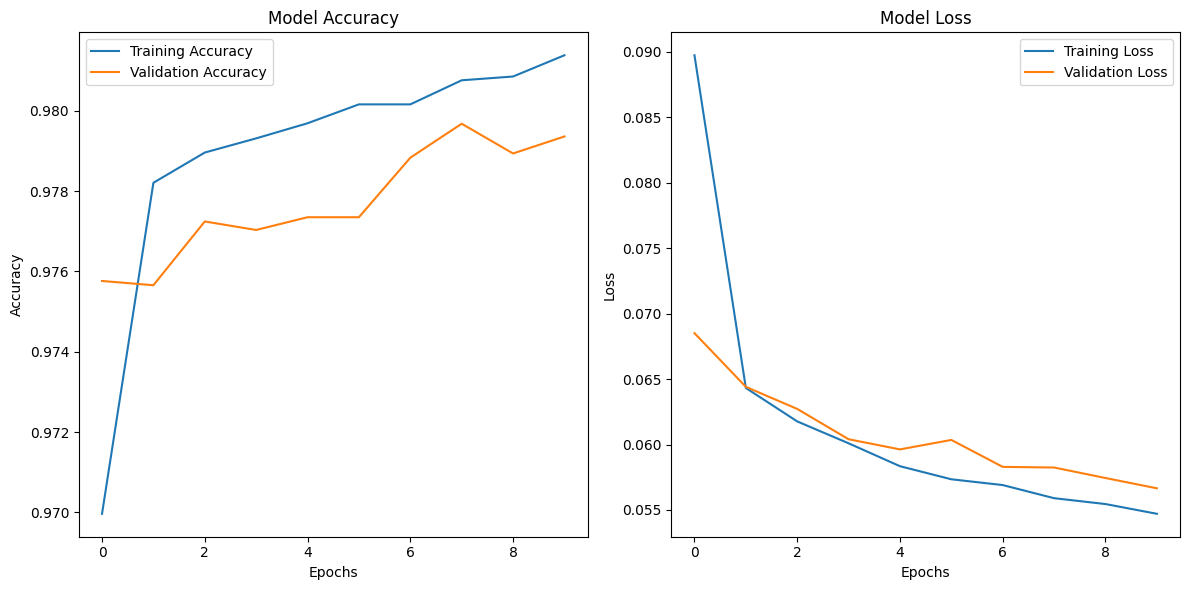

In [39]:
history = lstm_bin.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [40]:

# Saving the model
lstm_bin.save("../Models/lstm_binary.h5")


In [41]:
X_lstmb_test = X_lstmb_test.astype('float32').reshape((X_lstmb_test.shape[0], 1, 93))


In [42]:
# Evaluating the model
y_bin_pred = (lstm_bin.predict(X_lstmb_test) > 0.5).astype("float32").flatten()
bin_accuracy = accuracy_score(y_lstmb_test, y_bin_pred) * 100
print("LSTM Binary Set - Accuracy is ", bin_accuracy)


985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Binary Set - Accuracy is  98.1298025020639


In [43]:
# Printing classification report
report = classification_report(y_lstmb_test, y_bin_pred, target_names=le1_classes)
print(classification_report(y_lstmb_test, y_bin_pred, target_names=le1_classes))


              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     14720
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



In [44]:
with open('../Reports/classification_report_lstm.txt', 'w') as f:
    f.write(report)

# **LSTM Model for Multi-Class Classification**

In [45]:
# Reshaping input data to be 3-dimensional [samples, time steps, features] for LSTM
X_lstmm = X2.reshape((X2.shape[0], 1, X2.shape[1]))


In [46]:
# Splitting dataset into training (75%) and testing (25%) sets
X_lstmm_train, X_lstmm_test, y_lstmm_train, y_lstmm_test = train_test_split(X_lstmm, Y2, test_size=0.25, random_state=42)

In [47]:
# Building the LSTM model
lstm_multi = Sequential()
lstm_multi.add(LSTM(50, input_shape=(X_lstmm_train.shape[1], X_lstmm_train.shape[2]), return_sequences=True))
lstm_multi.add(LSTM(50))
lstm_multi.add(Dense(len(le2_classes), activation='softmax'))

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# Compiling the model
lstm_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# Convert to float32
X_lstmm_train = X_lstmm_train.astype('float32')
y_lstmm_train = y_lstmm_train.astype('float32')

In [50]:
# Training the model
lstm_multi.fit(X_lstmm_train, y_lstmm_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9509 - loss: 0.1670 - val_accuracy: 0.9653 - val_loss: 0.0988
Epoch 2/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9690 - loss: 0.0899 - val_accuracy: 0.9682 - val_loss: 0.0845
Epoch 3/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9727 - loss: 0.0803 - val_accuracy: 0.9726 - val_loss: 0.0756
Epoch 4/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9749 - loss: 0.0742 - val_accuracy: 0.9735 - val_loss: 0.0731
Epoch 5/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9765 - loss: 0.0705 - val_accuracy: 0.9750 - val_loss: 0.0719
Epoch 6/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9769 - loss: 0.0683 - val_accuracy: 0.9736 - val_loss: 0.0738
Epoch 7/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9771 - loss: 0.0666 - val_accuracy: 0.9772 - val_loss: 0.0645
Epoch 8/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9775 - loss: 0.0650 -

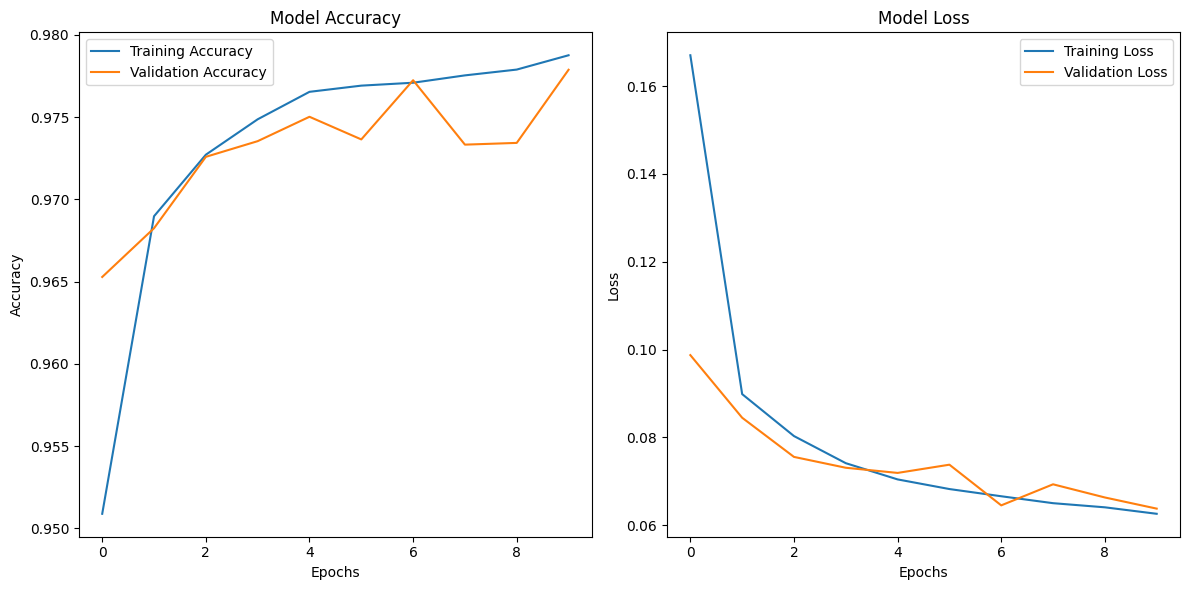

In [51]:
history = lstm_multi.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
# Saving the model
lstm_multi.save("../Models/lstm_multi.h5")

In [53]:
X_lstmm_test = X_lstmm_test.astype('float32').reshape((X_lstmb_test.shape[0], 1, 93))


In [54]:
# Evaluating the model
y_multi_pred = lstm_multi.predict(X_lstmm_test).argmax(axis=1)
multi_accuracy = accuracy_score(y_lstmm_test, y_multi_pred) * 100
print("LSTM Multi-Class Set - Accuracy is ", multi_accuracy)

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Multi-Class Set - Accuracy is  97.81228170445164


In [55]:
# Printing classification report
report = classification_report(y_lstmm_test, y_multi_pred, target_names=le2_classes)
print(classification_report(y_lstmm_test, y_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.99      0.97      0.98     11484
       Probe       0.94      0.95      0.95      2947
         R2L       0.84      0.73      0.78       274
         U2R       0.00      0.00      0.00        15
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.75      0.73      0.74     31494
weighted avg       0.98      0.98      0.98     31494



c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [56]:
with open('../Reports/classification_report_lstmm.txt', 'w') as f:
    f.write(report)

# **BLSTM Model with Attention**


In [57]:
# Reshaping input data to be 3-dimensional [samples, time steps, features] for LSTM
X_blstm = X2.reshape((X2.shape[0], 1, X2.shape[1]))

In [58]:
# Splitting dataset into training (75%) and testing (25%) sets
X_blstm_train, X_blstm_test, y_blstm_train, y_blstm_test = train_test_split(X_blstm, Y2, test_size=0.25, random_state=42)

In [59]:
# Ensure the input data is in float32 format
X_blstm_train = np.array(X_blstm_train, dtype='float32')
y_blstm_train = np.array(y_blstm_train, dtype='int32')  # Ensure target labels are integers for classification

In [60]:
print("X_blstm_train shape:", X_blstm_train.shape)
print("y_blstm_train shape:", y_blstm_train.shape)

X_blstm_train shape: (94479, 1, 93)
y_blstm_train shape: (94479,)


In [61]:
# Building the BiLSTM +  Attention model
bilstm_attention_model = Sequential()

In [62]:
# Define the model using the Functional API
inputs = Input(shape=(X_blstm_train.shape[1], X_blstm_train.shape[2]))

In [63]:
# Bidirectional LSTM layer
bilstm_out = Bidirectional(LSTM(50, return_sequences=True))(inputs)

In [64]:
from tensorflow.keras.layers import Attention

In [65]:
# Adding Multi-Head Attention layer
# Multi-Head Attention layer
attention_out = Attention()([bilstm_out, bilstm_out])
attention_out = LayerNormalization()(attention_out)

In [66]:
# Add a Dropout layer for regularization
attention_out = Dropout(0.2)(attention_out)

In [67]:
# Another Bidirectional LSTM layer
bilstm_out2 = Bidirectional(LSTM(50))(attention_out)

In [68]:
# Dense output layer for multi-class classification
outputs = Dense(len(le2_classes), activation='softmax')(bilstm_out2)

In [69]:
from tensorflow.keras.models import Model

In [70]:
# Creating the model
bilstm_attention_model = Model(inputs=inputs, outputs=outputs)

In [71]:
# Compiling the model
bilstm_attention_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# Ensure the input data is in float32 format
X_blstm_train = np.array(X_blstm_train, dtype='float32')
y_blstm_train = np.array(y_blstm_train, dtype='int32')  # Ensure target labels are integers for classification


In [73]:

# Before training, print the shapes to verify:
print("X_blstm_train shape:", X_blstm_train.shape)
print("y_blstm_train shape:", y_blstm_train.shape)

X_blstm_train shape: (94479, 1, 93)
y_blstm_train shape: (94479,)


In [75]:
# Training the model
bilstm_attention_model.fit(X_blstm_train, y_blstm_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9790 - loss: 0.0626 - val_accuracy: 0.9778 - val_loss: 0.0620
Epoch 2/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9793 - loss: 0.0618 - val_accuracy: 0.9787 - val_loss: 0.0597
Epoch 3/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9795 - loss: 0.0606 - val_accuracy: 0.9808 - val_loss: 0.0571
Epoch 4/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9794 - loss: 0.0606 - val_accuracy: 0.9793 - val_loss: 0.0602
Epoch 5/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9795 - loss: 0.0601 - val_accuracy: 0.9794 - val_loss: 0.0582
Epoch 6/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9798 - loss: 0.0589 - val_accuracy: 0.9785 - val_loss: 0.0594
Epoch 7/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9803 - loss: 0.0588 - val_accuracy: 0.9790 - val_loss: 0.0585
Epoch 8/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9803 -

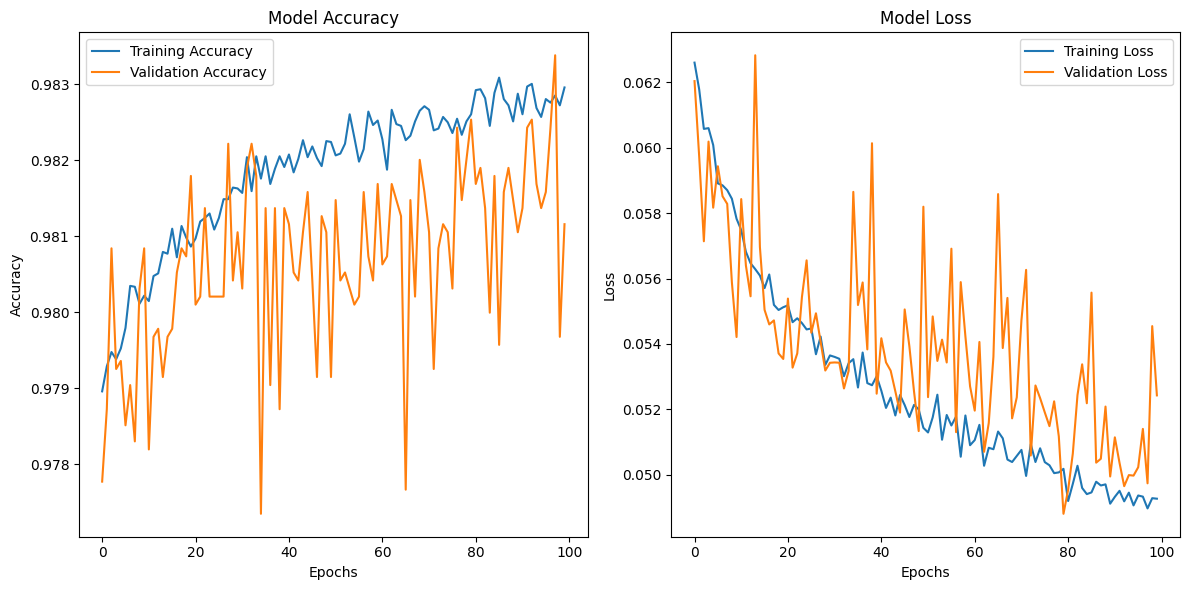

In [76]:
history = bilstm_attention_model.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [84]:
from tensorflow.keras.models import model_from_json

# Load the model's JSON file
with open('bilstm_attention_model.json', 'r') as json_file:
    model_json = json_file.read()

# Replace 'batch_shape' with 'input_shape' in the model JSON string
model_json = model_json.replace('"batch_shape": [null, 1, 93]', '"input_shape": [1, 93]')

# Reload the model from the modified JSON
model = model_from_json(model_json)

# Optionally, load the weights if they're stored separately
model.load_weights('../Models/model_weights.h5')

# Save the modified model as a new JSON file
with open('../Models/modified_bilstm_attention_model.json', 'w') as json_file:
    json_file.write(model.to_json())

# Optionally, save the entire model as a .h5 file
model.save('../Models/modified_bilstm_attention_model.h5')

print("Model and weights saved successfully!")



FileNotFoundError: [Errno 2] No such file or directory: 'bilstm_attention_model.json'

In [79]:
# Save the model
bilstm_attention_model.save("../Models/bilstm_attention_model.h5")

In [80]:
# Reshaping test data
X_blstm_test = X_blstm_test.astype('float32').reshape((X_blstm_test.shape[0], 1, X_blstm_test.shape[2]))

In [81]:
# Evaluating the model
y_multi_pred = bilstm_attention_model.predict(X_blstm_test).argmax(axis=1)
multi_accuracy = accuracy_score(y_blstm_test, y_multi_pred) * 100
print("BiLSTM + Multi-Head Attention Multi-Class Set - Accuracy is ", multi_accuracy)

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\ops\nn.py:947: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


979/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\ops\nn.py:947: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
BiLSTM + Multi-Head Attention Multi-Class Set - Accuracy is  98.3012637327745


In [82]:

# Printing classification report
report = classification_report(y_blstm_test, y_multi_pred, target_names=le2_classes)

print(classification_report(y_blstm_test, y_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.99      0.98      0.99     11484
       Probe       0.96      0.97      0.96      2947
         R2L       0.88      0.83      0.86       274
         U2R       0.00      0.00      0.00        15
      normal       0.98      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.76      0.75      0.76     31494
weighted avg       0.98      0.98      0.98     31494



In [83]:
with open('../Reports/classification_report_blstm.txt', 'w') as f:
    f.write(report)

In [85]:
f.close()

Accuracy: 0.9830
Precision: 0.9826
Recall: 0.9830
F1 Score: 0.9828


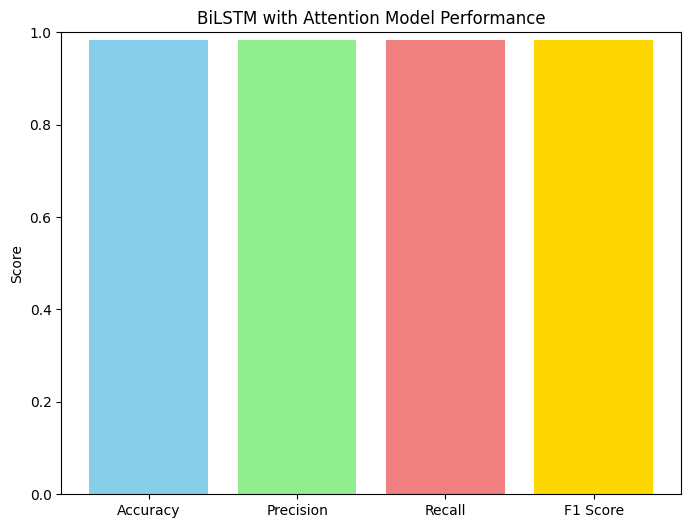

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_blstm_test and y_multi_pred are your true and predicted labels respectively
# Calculate metrics
accuracy = accuracy_score(y_blstm_test, y_multi_pred)
precision = precision_score(y_blstm_test, y_multi_pred, average='weighted')
recall = recall_score(y_blstm_test, y_multi_pred, average='weighted')
f1 = f1_score(y_blstm_test, y_multi_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create bar plot for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('BiLSTM with Attention Model Performance')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for score range
plt.show()

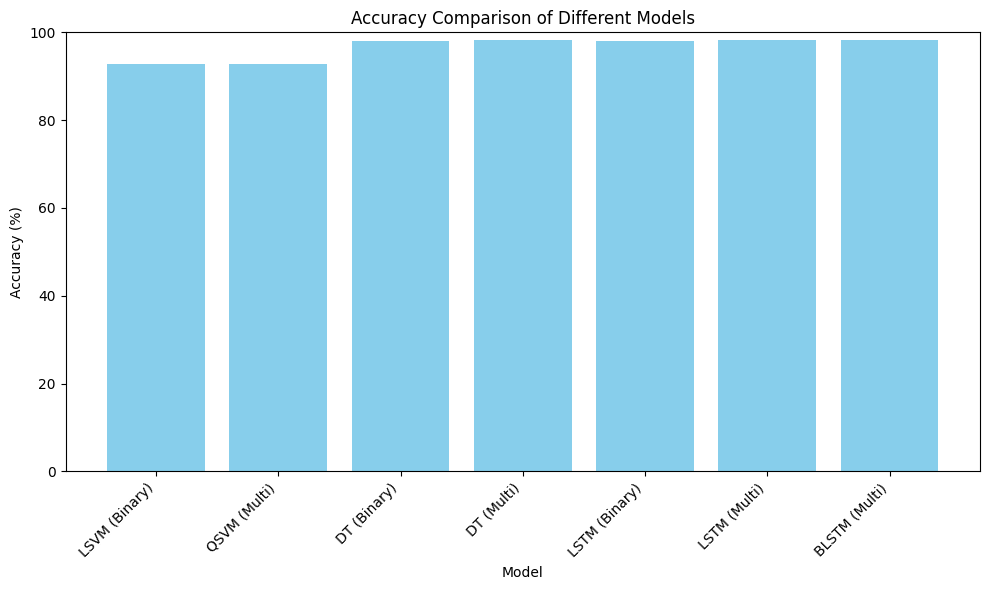

In [87]:

# Accuracy scores for each model
models = ['LSVM (Binary)', 'QSVM (Multi)', 'DT (Binary)', 'DT (Multi)', 'LSTM (Binary)', 'LSTM (Multi)', 'BLSTM (Multi)']
accuracies = [ac, ac, bin_accuracy, multi_accuracy, bin_accuracy, multi_accuracy, multi_accuracy]

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim([0, 100])  # Set y-axis limits to 0-100 for accuracy percentage

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


#  **Predicting Sample**

In [92]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np


# Load your sample CSV data
sample_data = pd.read_csv('../sample_input.csv')

# Preprocess the data (match preprocessing done during training)
X_sample = sample_data.values  # Convert to numpy array
X_sample = X_sample.reshape((X_sample.shape[0], 1, X_sample.shape[1]))  # Reshape to (samples, time_steps, features)
X_sample = np.array(X_sample, dtype='float32')

# Load the saved model
model = load_model('../Models/modified_bilstm_attention_model.h5')

# Make predictions
predictions = model.predict(X_sample)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# If you have the label encoder (le2_classes), convert class indices back to labels
# predicted_labels = le2_classes.inverse_transform(predicted_classes)

# Print the predicted class indices or labels
print("Predicted classes (indices):", predicted_classes)

c:\Users\user\Desktop\Projet-securite\.venv\Lib\site-packages\keras\src\ops\nn.py:947: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
Predicted classes (indices): [0 0 4 1 4 3 2 0 4 1]


In [90]:
import numpy as np

# Load the label classes from the le2_classes.npy file
le2_classes = np.load('../Data/label_classes/le2_classes.npy', allow_pickle=True)

# Predict the classes
predictions = model.predict(X_sample)

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Convert class indices to class names
predicted_class_names = le2_classes[predicted_class_indices]

print("Predicted class names:")
for i in predicted_class_names:
  print(i+"\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class names:
Dos

Dos

normal

Probe

normal

U2R

R2L

Dos

normal

Probe

